# Fraudulent Transactions Data

# CRISP-DM: 1. Business Understanding

**Tujuan Bisnis:**


*   Mampu mendeteksi adanya indikasi Fraud pada transaksi keuangan dengan pola tipe transaksi, jumlah uang, rekening asal dan rekening tujuan, saldo awal dan saldo akhir



**Kriteria Sukses:**


*   Recall > 70%
*   Precission > 70%
*   Accuracy > 70%


**Tujuan Teknis Machine Learning Klassifikasi**


*   Model Machine Learning diharapkan mampu mengklasifikasi dan mendeteksi adanya indikasi Fraud pada suatu transaksi keuangan
*   List item

**Fitur-fitur yang dibutuhkan:**


*   step
*   type
*   amount
*   nameOrig
*   oldbalanceOrg
*   newbalanceOrig
*   nameDest
*   oldbalanceDest
*   newbalanceDest
*   isFraud

**Library yang dibutuhkan:**

In [ ]:
!pip install kaggle optuna xgboost lightgbm catboost

!pip install parfit

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

# Splitting Train-Test data
from sklearn.model_selection import train_test_split

# For Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# For showing Progress Bar
from tqdm.notebook import tqdm

import ipython_genutils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import roc_curve, auc, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import parfit.parfit as pf

import warnings
warnings.filterwarnings('ignore')

# CRISP-DM: 2. Data Understanding

**Sumber Data**

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

# ! kaggle datasets download chitwanmanchanda/fraudulent-transactions-data
# ! unzip fraudulent-transactions-data.zip

In [ ]:
# del df
df = pd.read_csv('https://raw.githubusercontent.com/rickirick/frauddata/main/fraud_data.csv')
temp = df.copy()
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,10,CASH_OUT,541717.28,C1211034901,0.00,0.00,C1489369739,1891374.23,2261758.48,0
1,351,PAYMENT,2631.74,C193165704,10301.07,7669.33,M1637438204,0.00,0.00,0
2,431,CASH_IN,144433.87,C915960264,9098954.44,9243388.31,C1219929653,169888.22,25454.34,0
3,204,PAYMENT,3621.74,C258960060,31370.00,27748.26,M615593615,0.00,0.00,0
4,227,TRANSFER,78824.95,C677713801,0.00,0.00,C1607721978,1080946.98,1159771.94,0
5,153,CASH_IN,208695.02,C548054701,14438.00,223133.02,C1858034698,0.00,0.00,0
6,141,CASH_OUT,82870.88,C1448157341,0.00,0.00,C1156634314,1970289.57,2053160.45,0
7,379,CASH_IN,146176.71,C336694706,51565.00,197741.71,C1142674025,582439.98,436263.27,0
8,375,TRANSFER,740802.69,C372271865,0.00,0.00,C1721568262,1663919.14,2404721.83,0
9,35,CASH_OUT,101944.02,C2131230579,14116.49,0.00,C1455817135,352465.84,201794.48,0


In [ ]:
df = temp.copy()
dataset = temp.copy()

In [ ]:
# df_types = pd.get_dummies(df['type'], prefix='type', drop_first=True)

**Penelaahan data**

Tampilkan Jumlah kolom

In [ ]:
display(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

Menampilkan adanya data yang NaN

In [ ]:
display(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
dtype: int64

Tampilkan tipe data pada dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320307 entries, 0 to 320306
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            320307 non-null  int64  
 1   type            320307 non-null  object 
 2   amount          320307 non-null  float64
 3   nameOrig        320307 non-null  object 
 4   oldbalanceOrg   320307 non-null  float64
 5   newbalanceOrig  320307 non-null  float64
 6   nameDest        320307 non-null  object 
 7   oldbalanceDest  320307 non-null  float64
 8   newbalanceDest  320307 non-null  float64
 9   isFraud         320307 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 24.4+ MB


**Penelaahan Statistic Data**

tampilkan sebaran seluruh data pada dataset dengan pairplot.

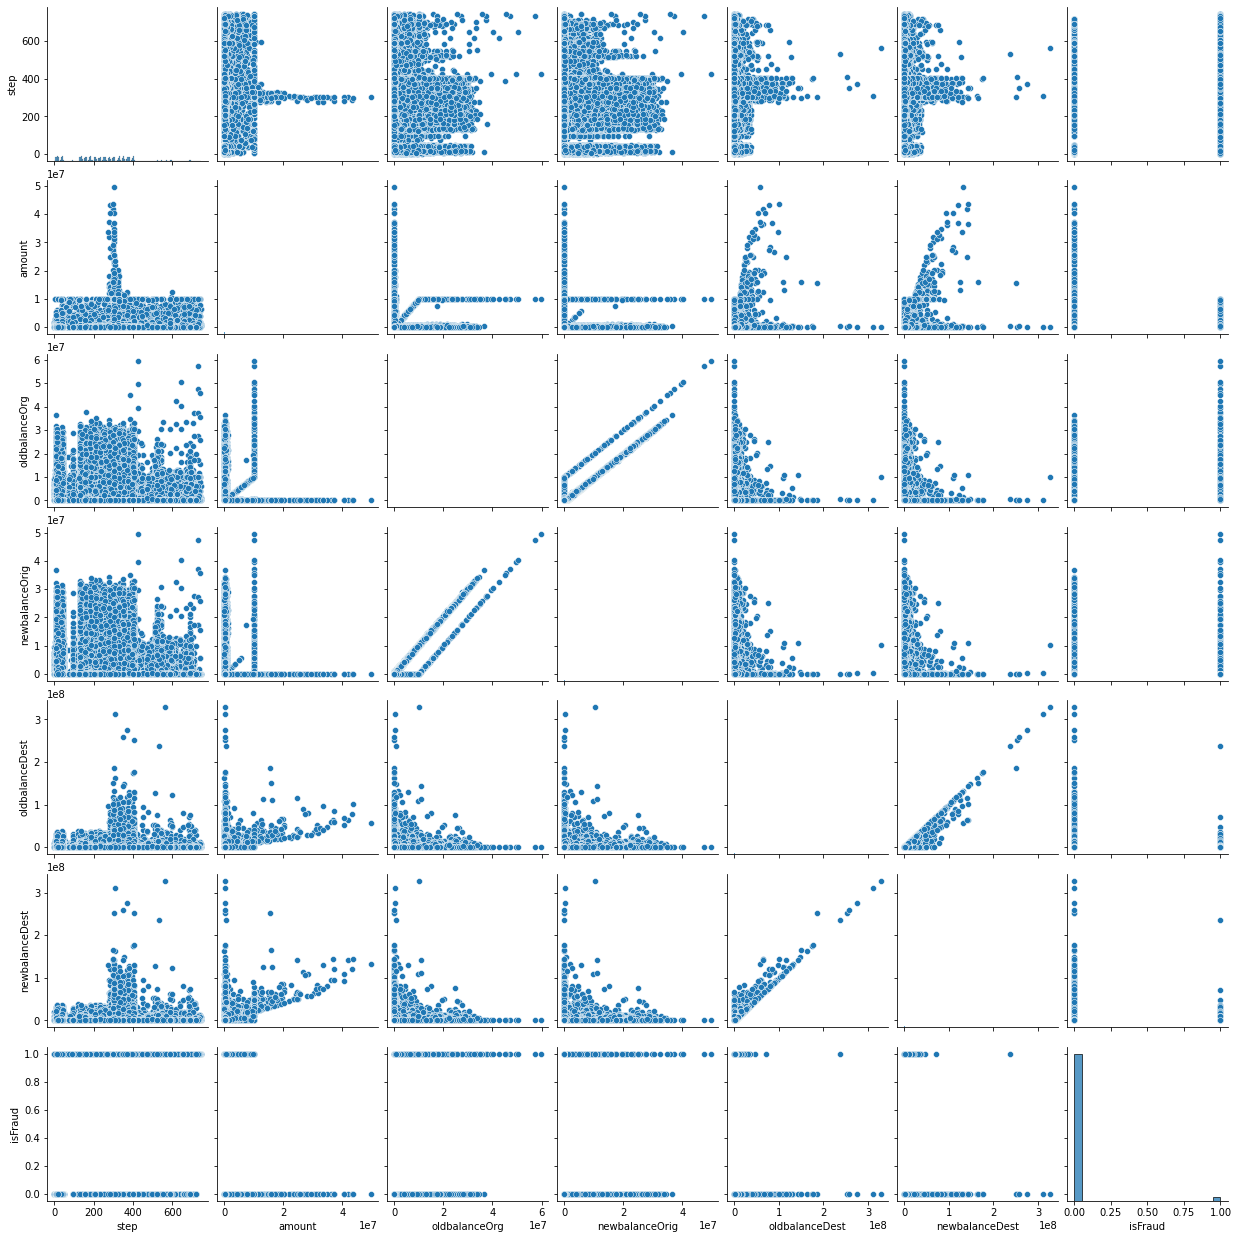

In [ ]:
sns.pairplot(df, palette="binary")

melihat central tendency pada dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,320307.0,2.461855e+02,1.458897e+02,1.0,156.000,249.00,346.000,7.430000e+02
amount,320307.0,2.118784e+05,7.261761e+05,0.0,13823.575,77961.04,215853.045,4.950709e+07
oldbalanceOrg,320307.0,8.487625e+05,2.901014e+06,0.0,0.000,15721.00,122147.000,5.958504e+07
newbalanceOrig,320307.0,8.336135e+05,2.898331e+06,0.0,0.000,0.00,133345.690,4.958504e+07
oldbalanceDest,320307.0,1.084950e+06,3.401104e+06,0.0,0.000,119118.68,918625.345,3.281945e+08
newbalanceDest,320307.0,1.225869e+06,3.686436e+06,0.0,0.000,209124.96,1110931.230,3.279981e+08
isFraud,320307.0,2.564103e-02,1.580621e-01,0.0,0.000,0.00,0.000,1.000000e+00


**Penelaahan Korelasi & Visualisasi Antar Fitur**

melihat korelasi antara fitur numerik pada dataset

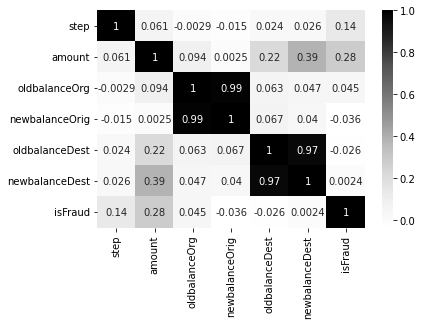

In [ ]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="Greys")
plt.show()

melihat sebaran dan jumlah kelas pada fitur target

0    312094
1      8213
Name: isFraud, dtype: int64

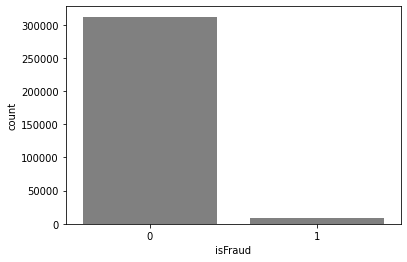

In [ ]:
display(df['isFraud'].value_counts())
sns.countplot(df['isFraud'], color="Grey")

# CRISP-DM: 3. Data Preparation

**Analytics Base Table (ABT)**

In [ ]:
dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,10,CASH_OUT,541717.28,C1211034901,0.00,0.00,C1489369739,1891374.23,2261758.48,0
1,351,PAYMENT,2631.74,C193165704,10301.07,7669.33,M1637438204,0.00,0.00,0
2,431,CASH_IN,144433.87,C915960264,9098954.44,9243388.31,C1219929653,169888.22,25454.34,0
3,204,PAYMENT,3621.74,C258960060,31370.00,27748.26,M615593615,0.00,0.00,0
4,227,TRANSFER,78824.95,C677713801,0.00,0.00,C1607721978,1080946.98,1159771.94,0
...,...,...,...,...,...,...,...,...,...,...
320302,160,CASH_OUT,548161.93,C2011336849,548161.93,0.00,C966258334,443736.12,991898.05,1
320303,308,CASH_OUT,170134.65,C155339836,31113.00,0.00,C844307973,240278.49,410413.14,0
320304,156,PAYMENT,26242.26,C543643337,53249.00,27006.74,M2090970863,0.00,0.00,0
320305,402,TRANSFER,63982.92,C308829984,0.00,0.00,C345145747,160144.33,224127.25,0


In [ ]:
# df.drop('isFlaggedFraud', axis=1, inplace=True)
target = df.pop("isFraud")
target = pd.DataFrame(target.to_numpy().flatten(), columns=['isFraud'])

In [ ]:
X = df
Y = target
display(X)
display(Y)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,10,CASH_OUT,541717.28,C1211034901,0.00,0.00,C1489369739,1891374.23,2261758.48
1,351,PAYMENT,2631.74,C193165704,10301.07,7669.33,M1637438204,0.00,0.00
2,431,CASH_IN,144433.87,C915960264,9098954.44,9243388.31,C1219929653,169888.22,25454.34
3,204,PAYMENT,3621.74,C258960060,31370.00,27748.26,M615593615,0.00,0.00
4,227,TRANSFER,78824.95,C677713801,0.00,0.00,C1607721978,1080946.98,1159771.94
...,...,...,...,...,...,...,...,...,...
320302,160,CASH_OUT,548161.93,C2011336849,548161.93,0.00,C966258334,443736.12,991898.05
320303,308,CASH_OUT,170134.65,C155339836,31113.00,0.00,C844307973,240278.49,410413.14
320304,156,PAYMENT,26242.26,C543643337,53249.00,27006.74,M2090970863,0.00,0.00
320305,402,TRANSFER,63982.92,C308829984,0.00,0.00,C345145747,160144.33,224127.25


,isFraud
0,0
1,0
2,0
3,0
4,0
...,...
320302,1
320303,0
320304,0
320305,0


**Data Quality Report dan Handling Strategy:**



In [ ]:
data_types = pd.DataFrame(
    df.dtypes,
    columns=['Data Type']
)

In [ ]:
missing_data = pd.DataFrame(
    df.isnull().sum(),
    columns=['Missing Values']
)

In [ ]:
unique_values = pd.DataFrame(
    columns=['Unique Values']
)
for row in list(df.columns.values):
    unique_values.loc[row] = [df[row].nunique()]

In [ ]:
minimum_values = pd.DataFrame(
    columns=['Minimum Value']
)
for row in list(df.columns.values):
    minimum_values.loc[row] = [df[row].min()]

In [ ]:
maximum_values = pd.DataFrame(
    columns=['Maximum Value']
)
for row in list(df.columns.values):
    maximum_values.loc[row] = [df[row].max()]

In [ ]:
data_quality_report = data_types.join(missing_data).join(unique_values).join(minimum_values).join(maximum_values)
data_quality_report

,Data Type,Missing Values,Unique Values,Minimum Value,Maximum Value
step,int64,0,743,1,743
type,object,0,5,CASH_IN,TRANSFER
amount,float64,0,312455,0.0,49507088.19
nameOrig,object,0,320282,C1000012233,C999983733
oldbalanceOrg,float64,0,146624,0.0,59585040.37
newbalanceOrig,float64,0,134949,0.0,49585040.37
nameDest,object,0,262626,C100001587,M999984210
oldbalanceDest,float64,0,181736,0.0,328194464.92
newbalanceDest,float64,0,194990,0.0,327998074.22


**Data Splitting**

split data train 80%, test 20%

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24, shuffle=True)

In [ ]:
print("Dimensi Data Sebelum Splitting:", "Desciptive Feature:", X.shape, "Target Feature:", Y.shape)
print("Dimensi Data Training Setelah Splitting 80%:", "Desciptive Feature:", X_train.shape, "Target Feature:", Y_train.shape)
print("Dimensi Data Testing Setelah Splitting 20%:", "Desciptive Feature:", X_test.shape, "Target Feature:", Y_test.shape)

Dimensi Data Sebelum Splitting: Desciptive Feature: (320307, 9) Target Feature: (320307, 1)
Dimensi Data Training Setelah Splitting 80%: Desciptive Feature: (256245, 9) Target Feature: (256245, 1)
Dimensi Data Testing Setelah Splitting 20%: Desciptive Feature: (64062, 9) Target Feature: (64062, 1)


**Encoding & Feature Engineering**

endocing dengan label encoding. ada 2 kelompok kategori
1. kategori tipe data transaksi. pada ketegori ini dianggap masing-masing tipe punya hubungan ataupun urutan dengan tipe lainnya.
2. kategori rekening transaksi. pada kategori ini dianggap masing-masing rekening punya hubungan/berhubungan dengan rekening lainnya.

In [ ]:
label_type = LabelEncoder()
label_name = LabelEncoder()

In [ ]:
df_categorical = X_train.select_dtypes(include=['object'])
df_categorical['type'] = label_type.fit_transform(df_categorical['type'])
df_categorical['nameOrig'] = label_name.fit_transform(df_categorical['nameOrig'])
df_categorical['nameDest'] = label_name.fit_transform(df_categorical['nameDest'])
df_categorical

,type,nameOrig,nameDest
261668,3,246340,188768
262583,0,159154,80109
90818,3,77200,141438
256107,0,255511,82061
135727,0,222189,5714
...,...,...,...
307183,3,201729,171473
268644,1,250888,13352
211136,1,186837,81939
899,3,170399,152653


In [ ]:
df_numerical = X_train.select_dtypes(include=['int64', 'float64'])
df_numerical

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
261668,181,11106.63,0.00,0.00,0.00,0.00
262583,35,238007.08,1881182.90,2119189.98,491460.51,253453.44
90818,393,14926.89,0.00,0.00,0.00,0.00
256107,370,301535.98,11026.00,312561.98,20716570.11,20415034.13
135727,178,207779.02,7716099.90,7923878.91,547107.18,339328.16
...,...,...,...,...,...,...
307183,249,12518.94,0.00,0.00,0.00,0.00
268644,306,239686.25,92281.00,0.00,0.00,239686.25
211136,164,165098.80,12360.00,0.00,6834875.37,6999974.17
899,307,21315.38,617.82,0.00,0.00,0.00


In [ ]:
X_train = pd.concat([df_categorical, df_numerical], axis=1)
# X.drop(['isFlaggedFraud'], axis=1, inplace=True)
X_train

,type,nameOrig,nameDest,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
261668,3,246340,188768,181,11106.63,0.00,0.00,0.00,0.00
262583,0,159154,80109,35,238007.08,1881182.90,2119189.98,491460.51,253453.44
90818,3,77200,141438,393,14926.89,0.00,0.00,0.00,0.00
256107,0,255511,82061,370,301535.98,11026.00,312561.98,20716570.11,20415034.13
135727,0,222189,5714,178,207779.02,7716099.90,7923878.91,547107.18,339328.16
...,...,...,...,...,...,...,...,...,...
307183,3,201729,171473,249,12518.94,0.00,0.00,0.00,0.00
268644,1,250888,13352,306,239686.25,92281.00,0.00,0.00,239686.25
211136,1,186837,81939,164,165098.80,12360.00,0.00,6834875.37,6999974.17
899,3,170399,152653,307,21315.38,617.82,0.00,0.00,0.00


mapping label encoding

In [ ]:
label_type_mapping = dict(zip(label_type.classes_, label_type.transform(label_type.classes_)))
label_type_mapping

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}

In [ ]:
label_name_mapping = dict(zip(label_name.classes_, label_name.transform(label_name.classes_)))
label_name_mapping

{'C100001587': 0,
 'C1000015936': 1,
 'C1000039615': 2,
 'C1000044204': 3,
 'C1000057469': 4,
 'C1000058185': 5,
 'C1000067836': 6,
 'C1000090286': 7,
 'C1000090398': 8,
 'C1000094209': 9,
 'C1000113023': 10,
 'C1000124012': 11,
 'C1000124976': 12,
 'C1000151306': 13,
 'C1000156006': 14,
 'C1000196560': 15,
 'C1000219612': 16,
 'C1000248804': 17,
 'C1000314808': 18,
 'C1000322805': 19,
 'C1000331638': 20,
 'C1000334245': 21,
 'C1000351574': 22,
 'C1000352325': 23,
 'C1000356965': 24,
 'C1000366880': 25,
 'C1000367306': 26,
 'C1000374016': 27,
 'C1000375697': 28,
 'C1000407130': 29,
 'C1000420363': 30,
 'C1000422391': 31,
 'C1000430395': 32,
 'C1000469870': 33,
 'C1000474463': 34,
 'C1000513905': 35,
 'C1000545031': 36,
 'C1000558190': 37,
 'C1000566564': 38,
 'C1000574865': 39,
 'C1000610515': 40,
 'C1000621564': 41,
 'C1000623666': 42,
 'C1000630508': 43,
 'C10006350': 44,
 'C1000641305': 45,
 'C1000700084': 46,
 'C1000724863': 47,
 'C1000726834': 48,
 'C1000732532': 49,
 'C100074100'

In [ ]:
X_test_temp = X_test.select_dtypes(include=['object'])
X_test['type'] = label_type.transform(X_test_temp['type'])
X_test['nameOrig'] = label_name.fit_transform(X_test_temp['nameOrig'])
X_test['nameDest'] = label_name.fit_transform(X_test_temp['nameDest'])
X_test

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
236196,14,0,202118.16,8037,7420563.02,7622681.18,26374,2999092.09,2.890948e+06
50733,283,1,159365.78,4962,39841.00,0.00,18357,0.00,1.593658e+05
283244,519,4,1644253.61,61596,1644253.61,0.00,25270,0.00,0.000000e+00
94966,307,1,354495.97,29462,135849.00,0.00,3768,0.00,3.544960e+05
37043,357,3,2499.75,37836,229309.24,226809.49,55772,0.00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
125228,277,3,12802.19,45255,0.00,0.00,45540,0.00,0.000000e+00
282537,261,1,206117.79,13325,7237.55,0.00,20957,1521918.36,1.728036e+06
150849,211,1,54948.46,49160,0.00,0.00,9163,1789785.14,1.844734e+06
108714,138,4,331156.40,8598,0.00,0.00,29209,2692463.18,3.023620e+06


**Data Balancing (Undersampling)**

In [ ]:
# np.bincount(Y_train.to_numpy().flatten())
display(Y_train.value_counts())

isFraud
0          249636
1            6609
dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

balancing_strategy = RandomUnderSampler(sampling_strategy=0.1)
# balancing_strategy = SMOTE(random_state=42)

X_train, Y_train = balancing_strategy.fit_resample(X_train, Y_train)

In [ ]:
# np.bincount(Y_train.to_numpy().flatten())
display(Y_train.value_counts())

isFraud
0          66090
1           6609
dtype: int64

**Features Selection**

Feature Elimination ke minimal mengambil 6 fitur. dipakai recursive feature engineering

In [ ]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
FElimination = RFECV(
                    estimator=clf_rf_4, 
                    step=1, cv=3, #3-fold cross-validation
                    scoring='recall', 
                    min_features_to_select=6
                    )   
FElimination = FElimination.fit(X_train, Y_train)

print('Optimal number of features :', FElimination.n_features_)
print('Best features :', X_train.columns[FElimination.support_])
n_features = FElimination.n_features_

Optimal number of features : 6
Best features : Index(['type', 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'newbalanceDest'],
      dtype='object')


**Plot cross validation feature elimination menggunakan recursive Feature Elimination**

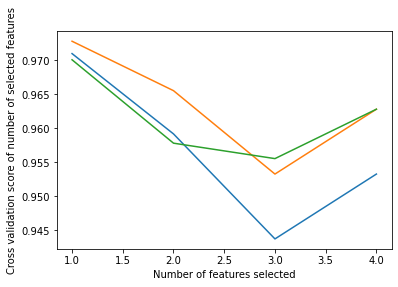

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(FElimination.grid_scores_) + 1), FElimination.grid_scores_)
plt.show()

In [ ]:
print('Chosen best {} feature:'.format(n_features),X_train.columns[FElimination.support_])
columns_supported = X_train.columns[FElimination.support_].tolist()

Chosen best 6 feature: Index(['type', 'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'newbalanceDest'],
      dtype='object')


**Slice kolom berdasarkan hasil Feature Elimination dari Recursive Feature Elimination**

In [ ]:
X_train = X_train[columns_supported]
X_train

,type,step,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest
0,4,33,822480.63,42107.00,0.00,822480.63
1,0,281,31913.46,402308.78,434222.24,2728035.29
2,1,8,320732.37,0.00,0.00,3086545.36
3,0,139,34573.35,12991678.62,13026251.97,36884.92
4,3,259,12146.32,63466.00,51319.68,0.00
...,...,...,...,...,...,...
72694,4,169,978261.98,978261.98,0.00,0.00
72695,4,530,387773.97,387773.97,0.00,0.00
72696,4,702,573266.42,573266.42,0.00,0.00
72697,4,133,1159010.44,1159010.44,0.00,0.00


In [ ]:
X_test = X_test[columns_supported]
X_test

,type,step,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest
236196,0,14,202118.16,7420563.02,7622681.18,2.890948e+06
50733,1,283,159365.78,39841.00,0.00,1.593658e+05
283244,4,519,1644253.61,1644253.61,0.00,0.000000e+00
94966,1,307,354495.97,135849.00,0.00,3.544960e+05
37043,3,357,2499.75,229309.24,226809.49,0.000000e+00
...,...,...,...,...,...,...
125228,3,277,12802.19,0.00,0.00,0.000000e+00
282537,1,261,206117.79,7237.55,0.00,1.728036e+06
150849,1,211,54948.46,0.00,0.00,1.844734e+06
108714,4,138,331156.40,0.00,0.00,3.023620e+06


In [ ]:
temp_X_train = X_train.copy()
temp_X_test = X_test.copy()

**Data Cleaning**

In [ ]:
def analizeSpreadData(originalData):
  mean = originalData.mean()
  median = originalData.median()
  mode = originalData.mode()[0]

  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (3, 3)})
  sns.boxplot(originalData, ax=ax_box, color="y", width=10)
  ax_box.axvline(mean, color='r', linestyle='--')
  ax_box.axvline(median, color='g', linestyle='-')
  ax_box.axvline(mode, color='b', linestyle='-')

  sns.distplot(originalData, ax=ax_hist, hist=False, color="m", kde_kws={"shade": True})
  ax_box.axvline(mean, color='r', linestyle='--')
  ax_box.axvline(median, color='g', linestyle='-')
  ax_box.axvline(mode, color='b', linestyle='-')

  plt.legend({'Mean':mean,'Median':median,'Mode':mode})

  ax_box.set(xlabel='')
  plt.show()

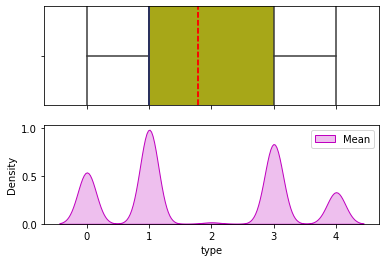

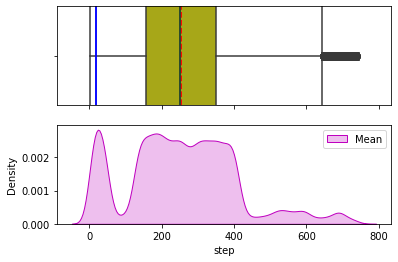

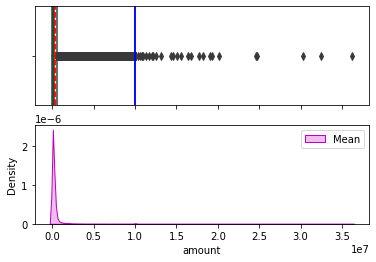

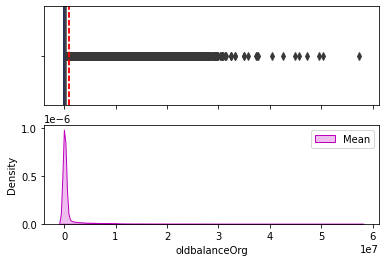

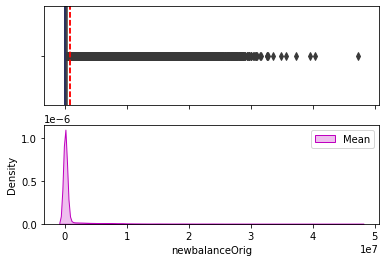

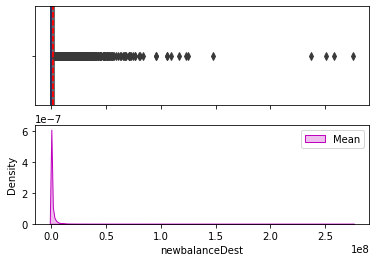

In [ ]:
for columns in X_train.columns:
  analizeSpreadData(X_train[columns])

Pada boxplot diatas terlihat banyaknya outlier di kolom 'amount', 'oldbalance orig', 'newbalanceOrig' dan 'newbalanceDest' karena perbedaan jumlah uang yang merupakan indikasi dari Fraudulent. oleh karena itu kami tidak melakukan removing outlier agar tidak banyak informasi penting yang hilang.

**Scaling / Normalisasi**

In [ ]:
mean_df = X_train.mean()
std_df = X_train.std()
normalized_X_train=(X_train-mean_df)/std_df
normalized_X_test=(X_test-mean_df)/std_df

In [ ]:
print("feature descriptive train")
display(normalized_X_train.describe().T)
print("feature descriptive test")
display(normalized_X_test.describe().T)

feature descriptive train


,count,mean,std,min,25%,50%,75%,max
type,72699.0,1.349524e-14,1.0,-1.294692,-0.571860,-0.571860,0.873803,1.596635
step,72699.0,-1.613196e-15,1.0,-1.629501,-0.632084,-0.020764,0.622731,3.145232
amount,72699.0,1.796142e-15,1.0,-0.303507,-0.288055,-0.213285,-0.060882,36.585815
oldbalanceOrg,72699.0,-7.545994e-15,1.0,-0.306039,-0.306039,-0.298962,-0.246014,19.184219
newbalanceOrig,72699.0,-1.834789e-14,1.0,-0.277706,-0.277706,-0.277706,-0.239965,16.414770
newbalanceDest,72699.0,-3.175679e-16,1.0,-0.321185,-0.321185,-0.269321,-0.034299,70.966351


feature descriptive test


,count,mean,std,min,25%,50%,75%,max
type,64062.0,-0.045629,0.980025,-1.294692,-0.571860,-0.571860,0.873803,1.596635
step,64062.0,-0.053313,0.936791,-1.629501,-0.638519,-0.085113,0.584122,3.145232
amount,64062.0,-0.091760,0.723285,-0.303507,-0.289277,-0.223220,-0.083135,41.071756
oldbalanceOrg,64062.0,-0.016913,0.979795,-0.306039,-0.306039,-0.300617,-0.263149,19.955714
newbalanceOrig,64062.0,0.017854,1.016128,-0.277706,-0.277706,-0.277706,-0.228428,17.215164
newbalanceDest,64062.0,-0.004779,0.952341,-0.321185,-0.321185,-0.267313,-0.033781,65.031255


# CRISP-DM: 4. Modeling

**Skenario Model:**

Skenario eksperimen:
tuning parameter, grid search

Skenario pengujian beberapa algoritma:


## Modeling Tanpa Tuning parameter

### Logistic Regression Model

In [ ]:
model_log = LogisticRegression(multi_class='auto', tol=1e-4)
model_log.fit(X_train, Y_train)
Ypred_log = model_log.predict(X_train)

print("Recall Score Training dari hasil modeling Logistic Regression (tanpa fine tuning):", recall_score(Y_train, Ypred_log))

Recall Score Training dari hasil modeling Logistic Regression (tanpa fine tuning): 0.7084279013466485


### K-Nearest Neighbor Model

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(temp_X_train, Y_train)
Ypred_knn = model_knn.predict(X_train)

print("Recall Score Training dari hasil modeling KNN (tanpa fine tuning):", recall_score(Y_train, Ypred_knn))

Recall Score Training dari hasil modeling KNN (tanpa fine tuning): 0.9231351187774247


### Support Vector Machine Model

In [ ]:
model_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model_svm.fit(X_train, Y_train)
Ypred_svm = model_svm.predict(X_train)

print("Recall Score Training dari hasil modeling SVM (tanpa fine tuning):", recall_score(Y_train, Ypred_svm))

Recall Score Training dari hasil modeling SVM (tanpa fine tuning): 0.7491299742775004


## Tuning Parameter: Grid Search

pada grid search dilakukan juga cross validation sebanyak 4 segmen

### **Logistic Regression Model**

minimal 3 macam variasi nilai parameter jika ada parameter yang
harus disetting, misal parameter yang dipakai untuk stopping criterion
(jumlah iterasi, cost function, MSE, early stopping, rasio splitting) 

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    1.0s finished


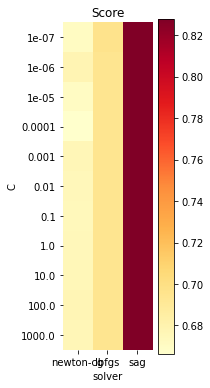

LogisticRegression(C=1e-07, n_jobs=-1, random_state=42, solver='sag') 0.827930174563591


In [ ]:
grid = {
    'C': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e+1, 1e+2, 1e+3],
    'solver'  : ['newton-cg', 'lbfgs', 'sag'],
    'n_jobs': [-1],
    # 'penalty': ['none','l2'],
    'random_state': [42],
}
paramGrid = ParameterGrid(grid)
bestModel_log, bestScore_log, allModels_log, allScores_log = pf.bestFit(LogisticRegression, paramGrid,
           X_train, Y_train, 
           X_val=X_test, y_val=Y_test,  
           metric = recall_score,
           nfolds=4
           )
print(bestModel_log, bestScore_log)

### **K-Nearest Neighbor Model**

minimal 3 macam variasi nilai parameter jika ada parameter yang
harus disetting, misal parameter yang dipakai untuk stopping criterion
(jumlah iterasi, cost function, MSE, early stopping, rasio splitting) 

In [ ]:
grid = {
    'n_neighbors': [4, 5],
    'weights'  : ['uniform', 'distance'],
    'n_jobs': [-1],
    'algorithm': ['auto', 'kd_tree'],
    'p': [1, 2],
}
paramGrid = ParameterGrid(grid)
bestModel_knn, bestScore_knn, allModels_knn, allScores_knn = pf.bestFit(KNeighborsClassifier, paramGrid,
           X_train, Y_train, 
           X_val=X_test, y_val=Y_test,  
           metric = recall_score,
           nfolds=4
           )
print(bestModel_knn, bestScore_knn)

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------
Too many dimensions to plot.
KNeighborsClassifier(n_jobs=-1, n_neighbors=4, p=1, weights='distance') 0.9233167082294265


[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   34.0s finished


### **Support Vector Machine Model**

minimal 3 macam variasi nilai parameter jika ada parameter yang
harus disetting, misal parameter yang dipakai untuk stopping criterion
(jumlah iterasi, cost function, MSE, early stopping, rasio splitting) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 15.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  5.2min finished


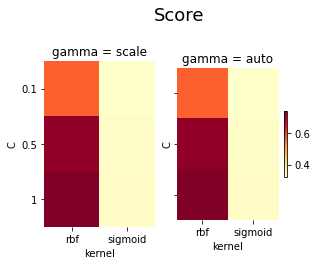

SVC(C=1) 0.7381546134663342


In [ ]:
grid = {
    'C': [0.1, 0.5, 1],
    'kernel'  : ['rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}
paramGrid = ParameterGrid(grid)
bestModel_svm, bestScore_svm, allModels_svm, allScores_svm = pf.bestFit(SVC, paramGrid,
           normalized_X_train, Y_train, 
           X_val=normalized_X_test, y_val=Y_test,  
           metric = recall_score,
           nfolds=4,
           )
print(bestModel_svm, bestScore_svm)

# CRISP-DM: 5. Evaluasi

## **Logistic Regression Model**

In [ ]:
model_log = LogisticRegression(multi_class='auto', tol=1e-4, solver='sag', C=1e-07)
model_log.fit(X_train, Y_train)
Ypred_log = model_log.predict(X_train)

print("Recall Score Training dari hasil modeling Logistic Regression (dengan fine tuning):", recall_score(Y_train, Ypred_log))

Yhat_log = model_log.predict(X_test)

Recall Score Training dari hasil modeling Logistic Regression (dengan fine tuning): 0.8235739143592071


**Confusion Matrix**

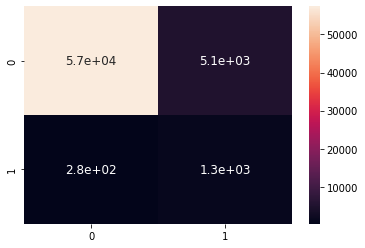

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_log = confusion_matrix(Y_test, Yhat_log)

cm_array_df_log = pd.DataFrame(confusion_matrix_log)
sns.heatmap(cm_array_df_log, annot=True, annot_kws={"size": 12}) 

**Classification Report : Accuracy, Precision, Recall, F1 Score**

In [ ]:
print(classification_report(Y_test, Yhat_log))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     62458
           1       0.21      0.83      0.33      1604

    accuracy                           0.92     64062
   macro avg       0.60      0.87      0.64     64062
weighted avg       0.98      0.92      0.94     64062



## **K-Nearest Neighbor Model**

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=4, p=1, weights='distance')
model_knn.fit(X_train, Y_train)
Ypred_knn = model_knn.predict(X_train)

print("Recall Score Training dari hasil modeling KNN (dengan fine tuning):", recall_score(Y_train, Ypred_knn))

Yhat_knn = model_knn.predict(X_test)

Recall Score Training dari hasil modeling KNN (dengan fine tuning): 1.0


**Confusion Matrix**

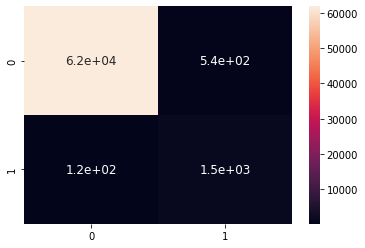

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_knn = confusion_matrix(Y_test, Yhat_knn)

cm_array_df_knn = pd.DataFrame(confusion_matrix_knn)
sns.heatmap(cm_array_df_knn, annot=True, annot_kws={"size": 12}) 

**Classification Report : Accuracy, Precision, Recall, F1 Score**

In [ ]:
print(classification_report(Y_test, Yhat_knn))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     62458
           1       0.73      0.92      0.82      1604

    accuracy                           0.99     64062
   macro avg       0.86      0.96      0.91     64062
weighted avg       0.99      0.99      0.99     64062



## **Support Vector Machine Model**

In [ ]:
model_svm = SVC(gamma='scale', kernel='rbf', C=1)
model_svm.fit(normalized_X_train, Y_train)
Ypred_svm = model_svm.predict(normalized_X_train)

print("Recall Score Training dari hasil modeling Logistic Regression (dengan fine tuning):", recall_score(Y_train, Ypred_svm))

Yhat_svm = model_svm.predict(normalized_X_test)

Recall Score Training dari hasil modeling Logistic Regression (dengan fine tuning): 0.7491299742775004


**Confusion Matrix**

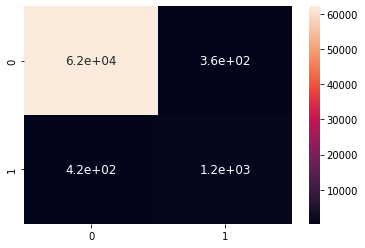

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_svm = confusion_matrix(Y_test, Yhat_svm)

cm_array_df_svm = pd.DataFrame(confusion_matrix_svm)
sns.heatmap(cm_array_df_svm, annot=True, annot_kws={"size": 12}) 

**Classification Report : Accuracy, Precision, Recall, F1 Score**

In [ ]:
print(classification_report(Y_test, Yhat_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     62458
           1       0.77      0.74      0.75      1604

    accuracy                           0.99     64062
   macro avg       0.88      0.87      0.87     64062
weighted avg       0.99      0.99      0.99     64062



**Referensi**

https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data

https://www.pschwan.de/how-to/setting-up-data-quality-reports-with-pandas-in-no-time

https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization

https://www.kaggle.com/code/saptarsi/smote-notebook/notebook

https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

https://scikit-learn.org/stable/modules/neighbors.html#classification